### import libs

In [2]:
import pandas as pd
import numpy as np

* read csv file

In [3]:
df = pd.read_csv('tennis.csv')

* show top datas

In [4]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,NaN,A,20181231,243,106034,NaN,NaN,...,37.0,28.0,14.0,11.0,5.0,8.0,185.0,275.0,136.0,421.0
1,2019-M020,Brisbane,Hard,NaN,A,20181231,244,117360,NaN,NaN,...,65.0,49.0,23.0,16.0,4.0,7.0,166.0,318.0,99.0,590.0
2,2019-M020,Brisbane,Hard,NaN,A,20181231,245,106423,NaN,NaN,...,44.0,31.0,7.0,9.0,5.0,7.0,146.0,367.0,119.0,482.0
3,2019-M020,Brisbane,Hard,NaN,A,20181231,246,106426,3.0,NaN,...,33.0,28.0,9.0,10.0,2.0,4.0,84.0,650.0,NaN,NaN
4,2019-M020,Brisbane,Hard,NaN,A,20181231,247,200175,7.0,NaN,...,21.0,12.0,7.0,7.0,3.0,8.0,131.0,433.0,297.0,125.0


In [5]:
df.drop(df[df.winner_hand == 'U'].index, axis = 0, inplace = True)
df.drop(df[df.loser_hand == 'U'].index, axis = 0, inplace = True)

In [6]:
dff = df.loc[:, ['winner_hand', 'loser_hand']]

In [7]:
dff

,winner_hand,loser_hand
0,R,R
2,R,R
4,R,R
5,R,L
7,R,L
...,...,...
1531,R,R
1532,R,R
1533,R,R
1534,R,R


In [8]:
a = dff['winner_hand'] == 'R'
b = dff['loser_hand'] == 'L'
c = a == b
d = dff[c]

In [9]:
d['success'] = d['winner_hand'].replace({'R' : 'success', 'L' : 'failure'})

<ipython-input-9-7ef3f245f015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['success'] = d['winner_hand'].replace({'R' : 'success', 'L' : 'failure'})


In [10]:
d.head()

,winner_hand,loser_hand,success
5,R,L,success
7,R,L,success
11,L,R,failure
23,L,R,failure
25,L,R,failure


In [15]:
ctab = pd.DataFrame({
'Right':[sum(df.winner_hand == 'R'), sum(df.loser_hand == 'R')],
    'Left':[sum(df.winner_hand == 'L'), sum(df.loser_hand == 'L')]
                     }, index = ['winners', 'losers'])

In [25]:
ctab

,Right,Left
winners,774,133
losers,784,122


In [17]:
ctab.sum()

Right    1558
Left      255
dtype: int64

In [18]:
p = (ctab.iloc[0, 0]/ctab.sum().sum())/(ctab.sum()[0]/ctab.sum().sum())

In [36]:
p

0.49679075738125805

In [20]:
d.shape

(229, 3)

In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [30]:
n = 229
k = np.arange(0, n, 1)
k.sort()
binomial = stats.binom.pmf(k, n, p)

Text(0, 0.5, 'prob of success')

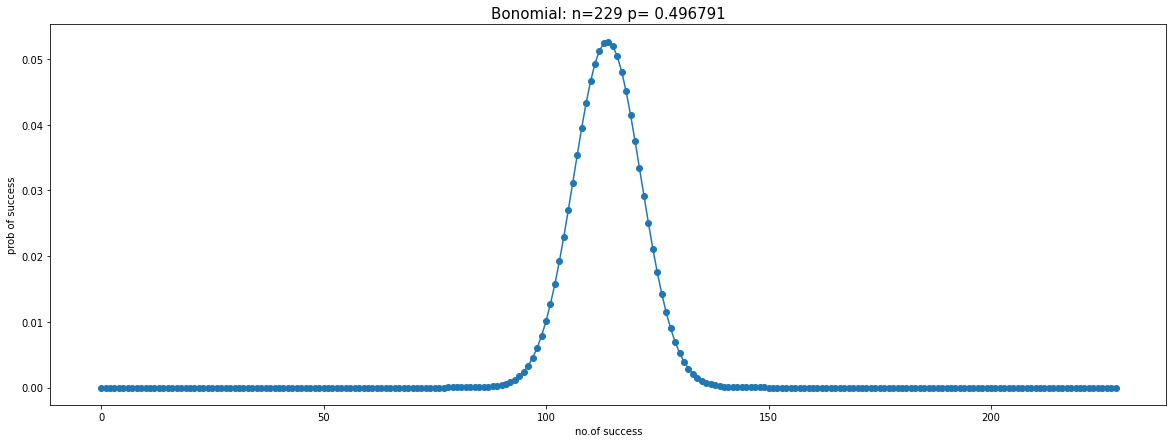

In [35]:
plt.figure(figsize=(20, 7))
plt.plot(k, binomial, 'o-')
plt.title('Bonomial: n=%i p= %f' %(n,p), fontsize=15)
plt.xlabel('no.of success')
plt.ylabel('prob of success')